## ${\textbf{Libraries}}$

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib.
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
#For standardizing features. I will use the StandardScaler module.
from sklearn.preprocessing import StandardScaler


## ${\textbf{Import Data}}$

In [36]:
# Loading the data
df = pd.read_csv("C:/Users/HP/Downloads/sales_2024.csv")

## ${\textbf{Explore Data}}$

In [38]:
# Descriptive analysis of the data set to gain some insight. 
print('Dataset sample')
df.head()

Dataset sample


,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date
0,29030,C660,Richard,1/01/2024,Medium,SKU814,10,19.84,0.05,4.10,Regular Air,Wrap Bag,2/01/2024
1,47591,C198,Bob,1/01/2024,Critical,SKU957,27,10.48,0.10,6.91,Regular Air,Small Box,2/01/2024
2,54214,C628,Bob,1/01/2024,Medium,SKU1076,38,199.99,0.04,24.49,Express Air,Large Box,4/01/2024
3,10945,C623,Bob,2/01/2024,Medium,SKU1158,14,95.99,0.04,8.99,Regular Air,Small Box,4/01/2024
4,50471,C219,Bob,2/01/2024,Low,SKU059,25,226.67,0.02,28.16,Delivery Truck,Jumbo Drum,4/01/2024


In [40]:
# Checking the number of columns and rows in the data set
print('Dimension of the dataset')
print(df.shape)

Dimension of the dataset
(2100, 13)


In [42]:
# Getting detailed description of the data set
print('\nDetail description of the dataset\n')
print(df.info())


Detail description of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           2100 non-null   int64  
 1   Customer ID        2100 non-null   object 
 2   SalesPerson        2100 non-null   object 
 3   Order Date         2100 non-null   object 
 4   Order Priority     2100 non-null   object 
 5   SKU                2100 non-null   object 
 6   Order Quantity     2100 non-null   int64  
 7   Unit Sell Price    2100 non-null   float64
 8   Discount           2100 non-null   float64
 9   Shipping Amount    2100 non-null   float64
 10  Ship Mode          2100 non-null   object 
 11  Product Container  2100 non-null   object 
 12  Ship Date          2100 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 213.4+ KB
None


In [44]:
# Changing Order ID from integer to a string

df['Order ID'] = df['Order ID'].astype(str)

In [49]:
# Convert 'Date' columns  to datetime

df['Order Date'] = pd.to_datetime(df['Order Date'] ,format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [51]:
# Getting detailed description of the data set

print('\nDetail description of the dataset\n')
print(df.info())


Detail description of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           2100 non-null   object        
 1   Customer ID        2100 non-null   object        
 2   SalesPerson        2100 non-null   object        
 3   Order Date         2100 non-null   datetime64[ns]
 4   Order Priority     2100 non-null   object        
 5   SKU                2100 non-null   object        
 6   Order Quantity     2100 non-null   int64         
 7   Unit Sell Price    2100 non-null   float64       
 8   Discount           2100 non-null   float64       
 9   Shipping Amount    2100 non-null   float64       
 10  Ship Mode          2100 non-null   object        
 11  Product Container  2100 non-null   object        
 12  Ship Date          2100 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float

In [53]:
# Getting the summary of key statistical metrics for each numerical column in a DataFrame, 
# provides insights about data spread, central tendency, and distribution.
# Lets check for both Numerical and Categorical Variables

df.describe(include='all')

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date
count,2100,2100,2100,2100,2100,2100,2100.000000,2100.000000,2100.000000,2100.000000,2100,2100,2100
unique,1397,632,3,NaN,5,958,NaN,NaN,NaN,NaN,3,7,NaN
top,43488,C248,Bob,NaN,High,SKU623,NaN,NaN,NaN,NaN,Regular Air,Small Box,NaN
freq,5,17,747,NaN,448,10,NaN,NaN,NaN,NaN,1610,1099,NaN
mean,NaN,NaN,NaN,2024-06-28 06:39:05.142857216,NaN,NaN,25.882857,93.110729,0.049705,12.917910,NaN,NaN,2024-06-30 07:01:42.857142784
min,NaN,NaN,NaN,2024-01-01 00:00:00,NaN,NaN,1.000000,0.990000,0.000000,0.490000,NaN,NaN,2024-01-02 00:00:00
25%,NaN,NaN,NaN,2024-04-01 18:00:00,NaN,NaN,13.000000,6.480000,0.020000,2.997500,NaN,NaN,2024-04-04 00:00:00
50%,NaN,NaN,NaN,2024-06-28 00:00:00,NaN,NaN,26.000000,21.520000,0.050000,6.160000,NaN,NaN,2024-06-30 00:00:00
75%,NaN,NaN,NaN,2024-09-23 00:00:00,NaN,NaN,39.000000,85.990000,0.080000,13.990000,NaN,NaN,2024-09-25 00:00:00
max,NaN,NaN,NaN,2024-12-30 00:00:00,NaN,NaN,50.000000,6783.020000,0.250000,147.120000,NaN,NaN,2024-12-30 00:00:00


In [55]:
#Checking the column names

df.columns

Index(['Order ID', 'Customer ID', 'SalesPerson', 'Order Date',
       'Order Priority', 'SKU', 'Order Quantity', 'Unit Sell Price',
       'Discount', 'Shipping Amount', 'Ship Mode', 'Product Container',
       'Ship Date'],
      dtype='object')

In [57]:
# calculating Total Sale
df['Total Sale'] = df['Unit Sell Price'] * df['Order Quantity']

# Aggregate Total Sale per Customer
df_Summary= df.groupby('Customer ID').agg({'Total Sale': 'sum', 'Order Date':'first'})
print('Total Sale per Customer')
df_Summary.head()

Total Sale per Customer


,Total Sale,Order Date
Customer ID,,
C003,98.67,2024-01-18
C004,5062.12,2024-10-02
C005,9272.82,2024-01-12
C007,1451.78,2024-05-28
C008,437.33,2024-03-21


In [61]:
# Checking for the top 5 customers before discount 
top_customers = df_Summary.groupby('Customer ID')['Total Sale'].sum().nlargest(5)

print(top_customers)

Customer ID
C179    54264.16
C393    52969.70
C226    39611.27
C171    38668.34
C406    38225.84
Name: Total Sale, dtype: float64


In [65]:
# Calculating revenue after applying the discount percentage
df['Revenue'] = df['Total Sale'] * (1 - df['Discount'])

# Display the DataFrame with new column
print(df[['Unit Sell Price', 'Order Quantity', 'Total Sale', 'Discount', 'Revenue']])

      Unit Sell Price  Order Quantity  Total Sale  Discount    Revenue
0               19.84              10      198.40      0.05   188.4800
1               10.48              27      282.96      0.10   254.6640
2              199.99              38     7599.62      0.04  7295.6352
3               95.99              14     1343.86      0.04  1290.1056
4              226.67              25     5666.75      0.02  5553.4150
...               ...             ...         ...       ...        ...
2095            19.98              31      619.38      0.00   619.3800
2096           832.81               1      832.81      0.09   757.8571
2097            13.73              45      617.85      0.08   568.4220
2098            60.98               6      365.88      0.06   343.9272
2099            13.48              35      471.80      0.10   424.6200

[2100 rows x 5 columns]


In [67]:
# Top 5 customers after discount 
top_customers_AD = df.groupby('Customer ID')['Revenue'].sum().nlargest(5)

print(top_customers_AD)

Customer ID
C393    50650.4632
C179    49380.3856
C226    38932.8373
C171    37197.6618
C406    36731.6436
Name: Revenue, dtype: float64


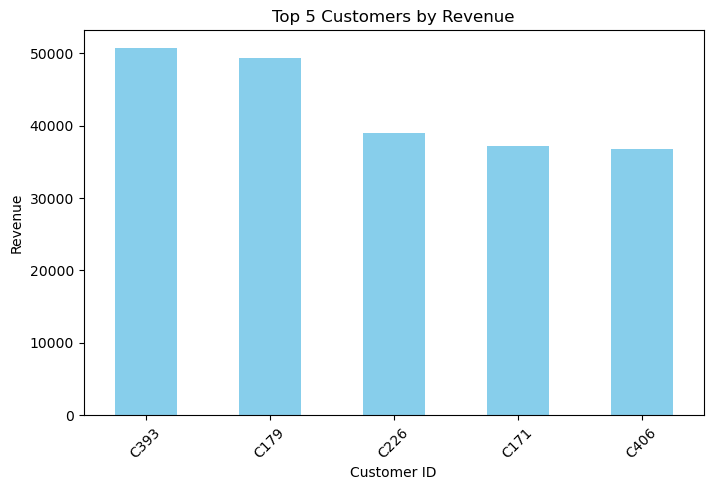

In [69]:
# Plot the top 5 customers
top_customers_AD.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

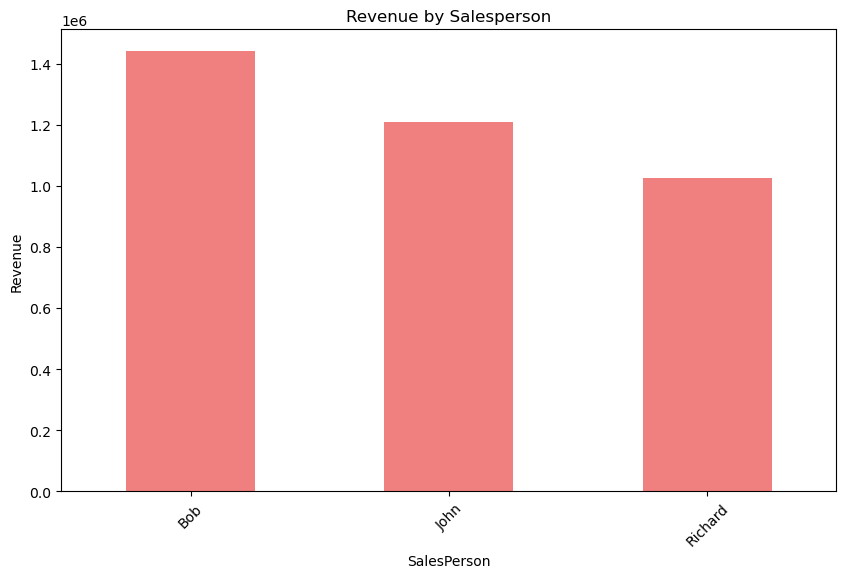

In [73]:
# Aggregating revenue by salesperson
revenue_by_salesperson = df.groupby('SalesPerson')['Revenue'].sum()

# Plot revenue by salesperson
revenue_by_salesperson.plot(kind='bar', color='lightcoral', figsize=(10, 6))
plt.title('Revenue by Salesperson')
plt.xlabel('SalesPerson')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

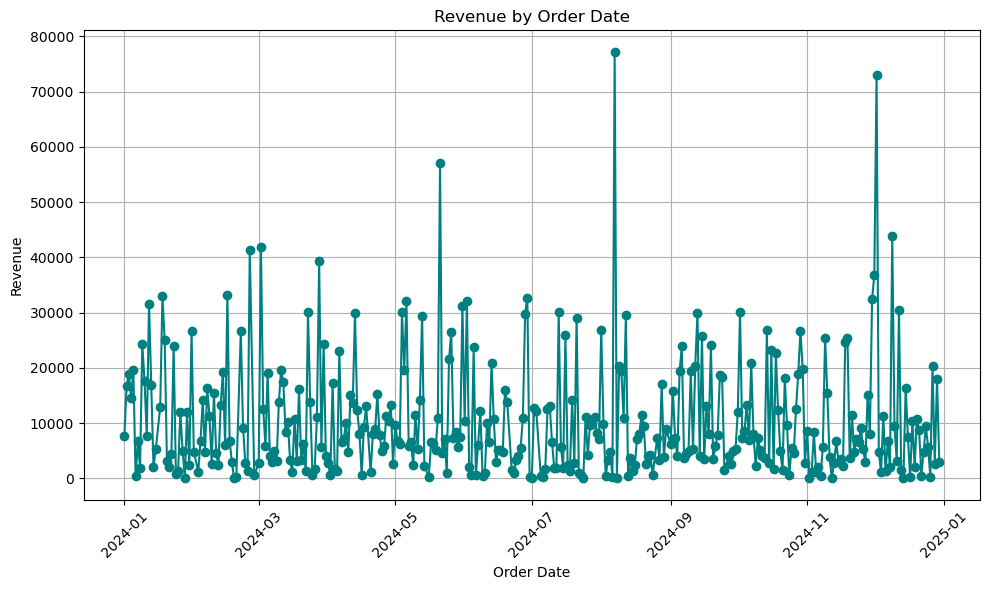

In [75]:
# Aggregate revenue by order date
revenue_by_date = df.groupby(df['Order Date'].dt.date)['Revenue'].sum()

# Plot revenue over time
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_date.index, revenue_by_date.values, marker='o', color='teal')
plt.title('Revenue by Order Date')
plt.xlabel('Order Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
# Aggregate revenue by order date
revenue_by_date = df.groupby(df['Order Date'].dt.date)['Revenue'].sum()

# Identify the days with the highest and lowest revenue
highest_revenue_day = revenue_by_date.idxmax()
lowest_revenue_day = revenue_by_date.idxmin()

# Create a summary table for highest and lowest revenue
summary_table = {
    'Day with Highest Revenue': [highest_revenue_day],
    'Highest Revenue Amount': [revenue_by_date[highest_revenue_day]],
    'Day with Lowest Revenue': [lowest_revenue_day],
    'Lowest Revenue Amount': [revenue_by_date[lowest_revenue_day]],
}

# Convert the summary table to a DataFrame
summary_df = pd.DataFrame(summary_table)

# Display the table
print(summary_df)

  Day with Highest Revenue  Highest Revenue Amount Day with Lowest Revenue  \
0               2024-08-07              77224.5092              2024-02-19   

   Lowest Revenue Amount  
0                 4.1184  


In [85]:
# Find the highest selling SKU by revenue
revenue_by_sku = df.groupby('SKU')['Revenue'].sum()
highest_revenue_sku = revenue_by_sku.idxmax()
highest_revenue_amount = revenue_by_sku[highest_revenue_sku]

# Find the highest selling SKU by quantity
quantity_by_sku = df.groupby('SKU')['Order Quantity'].sum()
highest_quantity_sku = quantity_by_sku.idxmax()
highest_quantity_sold = quantity_by_sku[highest_quantity_sku]

# Create a summary table for highest revenue and quantity sold
summary_table2 = {
    'Highest Revenue SKU': [highest_revenue_sku],
    'Highest Revenue Amount': [highest_revenue_amount],
    'Highest Quantity SKU': [highest_quantity_sku],
    'Highest Quantity Sold': [highest_quantity_sold],
}

# Convert the summary table to a DataFrame
summary_df2 = pd.DataFrame(summary_table2)

# Display the table
print(summary_df2)

  Highest Revenue SKU  Highest Revenue Amount Highest Quantity SKU  \
0              SKU050              81930.2692               SKU623   

   Highest Quantity Sold  
0                    245  


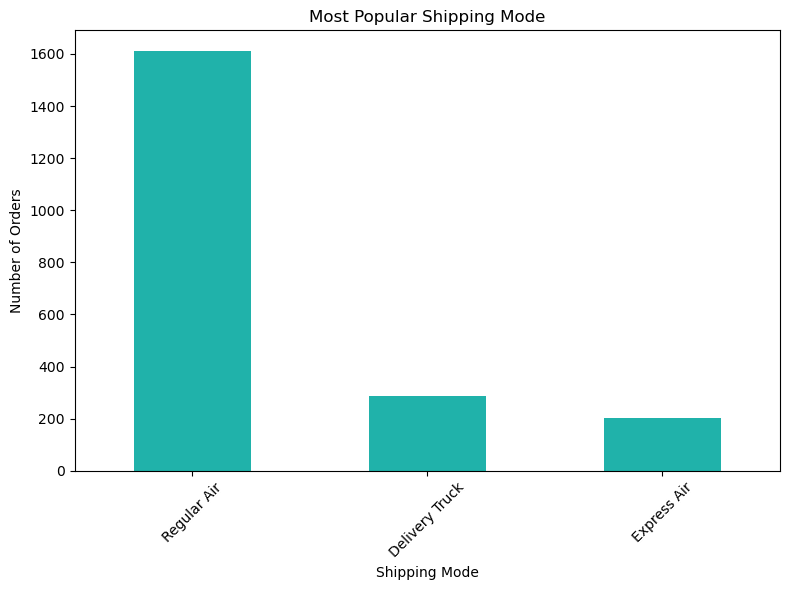

In [89]:
# Count the occurrences of each shipping mode
shipping_mode_counts = df['Ship Mode'].value_counts()

# Step 2: Plot the counts of each shipping mode
plt.figure(figsize=(8, 6))
shipping_mode_counts.plot(kind='bar', color='lightseagreen')

# Step 3: Add title and labels
plt.title('Most Popular Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [93]:
# Delivery Time (Shipping Duration)

# Calculating the delivery time (in days)
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [95]:
# Checking Shipping Delays or On-Time Shipping
# Identify orders that have a longer-than-usual shipping duration, indicating potential delays. 
# This could help track performance against expected shipping times or SLAs (service-level agreements).

# Flagging orders that take longer than a certain threshold (e.g., 3 days) to ship.

delayed_orders = df[df['Delivery Time'] > 3]  # Assuming 3 days is the threshold

In [97]:
# Display the delayed orders
print(delayed_orders)

     Order ID Customer ID SalesPerson Order Date Order Priority      SKU  \
5       16164        C278        John 2024-01-02            Low  SKU1113   
7       16164        C278        John 2024-01-02            Low   SKU481   
8       16164        C278         Bob 2024-01-02            Low   SKU745   
14      39619        C442        John 2024-01-03            Low   SKU155   
17      44646        C501         Bob 2024-01-03            Low   SKU969   
...       ...         ...         ...        ...            ...      ...   
1991    21344        C097     Richard 2024-12-09            Low   SKU519   
2015    34532        C133         Bob 2024-12-11            Low   SKU491   
2064     3202        C632     Richard 2024-12-23            Low  SKU1050   
2068    34400        C404        John 2024-12-24            Low   SKU742   
2069    34400        C404        John 2024-12-24            Low  SKU1153   

      Order Quantity  Unit Sell Price  Discount  Shipping Amount  \
5                 2

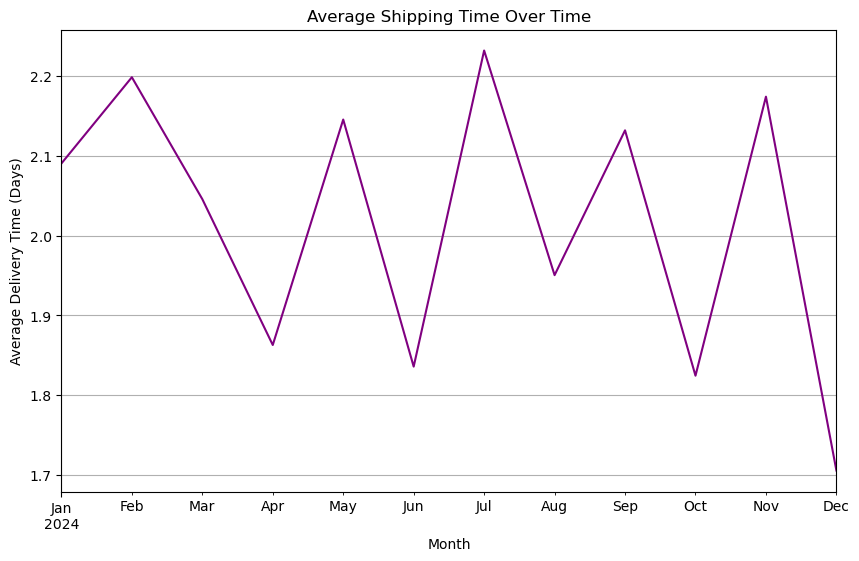

In [99]:
# Trends in Shipping Time Over Time
# Analyze how the average shipping time changes over time (e.g., by month, quarter). 
# This can show trends, such as whether shipping times are improving or getting worse due to operational factors 
# like seasonal demand or staffing issues.

df['Month'] = df['Order Date'].dt.to_period('M')  # Extract month
monthly_avg_shipping_time = df.groupby('Month')['Delivery Time'].mean()

# Plot the trends
monthly_avg_shipping_time.plot(kind='line', figsize=(10, 6), color='purple')
plt.title('Average Shipping Time Over Time')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (Days)')
plt.grid(True)
plt.show()